In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [2]:
#importing .csv of mentions of pancakes on Twitter in Ireland (Feb 23 - Mar 8)

In [3]:
pancakes = pd.read_csv("PancakeMentions.csv")
pancakes

,Date,Time,URL,Hit Sentence,Source,Influencer,Country,Subregion,Reach,Facebook Social Echo,Reddit Social Echo,Engagement,Sentiment
0,2022-03-08,06:45PM,https://twitter.com/MacyMaybe1/statuses/150126...,QT @pancakewafflet1: Paris brun 👍 ; what color...,Twitter,macymaybe1,Ireland,NaN,236,NaN,NaN,NaN,Neutral
1,2022-03-08,06:27PM,https://twitter.com/cally_callly/statuses/1501...,RT @SaitamaUniverse: QT @jbrizendine: The spee...,Twitter,cally_callly,Ireland,NaN,530,NaN,NaN,NaN,Positive
2,2022-03-08,06:26PM,https://twitter.com/Mcpsalmmy1/statuses/150126...,@PancakeChubby @UnitedStandMUFC Thank me later...,Twitter,mcpsalmmy1,Ireland,NaN,199,NaN,NaN,NaN,Positive
3,2022-03-08,05:56PM,https://twitter.com/AIPLF_Ireland/statuses/150...,RT @domballyfermot: *On fait des crêpes!!!!*🇫🇷...,Twitter,aiplf_ireland,Ireland,NaN,833,NaN,NaN,NaN,Neutral
4,2022-03-08,03:13PM,http://twitter.com/CryptoJ1mbo/statuses/150121...,"RT @WatcherGuru: JUST IN: PancakeSwap, the #1 ...",Twitter,CryptoJ1mbo,Ireland,NaN,1319,NaN,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,2022-02-23,01:28AM,https://twitter.com/NoeleenHanway/statuses/149...,@sjanemurf It's pancake week. Rules were chang...,Twitter,noeleenhanway,Ireland,NaN,517,NaN,NaN,NaN,Neutral
6200,2022-02-23,01:23AM,http://twitter.com/letsrockinroll3/statuses/14...,#Trending #worldwar3 💣 & #Pancaketuesday 🥞 Bea...,Twitter,letsrockinroll3,Ireland,NaN,3659,NaN,NaN,NaN,Positive
6201,2022-02-23,01:21AM,https://twitter.com/letsrockinroll3/statuses/1...,@thatniamh Now you get 2 Pancake Tuesdays. Hom...,Twitter,letsrockinroll3,Ireland,NaN,3659,NaN,NaN,NaN,Neutral
6202,2022-02-23,01:00AM,https://twitter.com/whetherrman/statuses/14962...,QT @whetherrman: Seeing so many others thinkin...,Twitter,whetherrman,Ireland,NaN,111,NaN,NaN,NaN,Positive


## Cleaning data

In [4]:
pancakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6204 non-null   object 
 1   Time                  6204 non-null   object 
 2   URL                   6204 non-null   object 
 3   Hit Sentence          6204 non-null   object 
 4   Source                6204 non-null   object 
 5   Influencer            6204 non-null   object 
 6   Country               6204 non-null   object 
 7   Subregion             0 non-null      float64
 8   Reach                 6204 non-null   int64  
 9   Facebook Social Echo  0 non-null      float64
 10  Reddit Social Echo    0 non-null      float64
 11  Engagement            835 non-null    float64
 12  Sentiment             6204 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 630.2+ KB


In [5]:
#Dropped Columns with no results

In [6]:
pancakes_prep = pancakes.dropna(axis=1, how='all')
pancakes_prep

,Date,Time,URL,Hit Sentence,Source,Influencer,Country,Reach,Engagement,Sentiment
0,2022-03-08,06:45PM,https://twitter.com/MacyMaybe1/statuses/150126...,QT @pancakewafflet1: Paris brun 👍 ; what color...,Twitter,macymaybe1,Ireland,236,NaN,Neutral
1,2022-03-08,06:27PM,https://twitter.com/cally_callly/statuses/1501...,RT @SaitamaUniverse: QT @jbrizendine: The spee...,Twitter,cally_callly,Ireland,530,NaN,Positive
2,2022-03-08,06:26PM,https://twitter.com/Mcpsalmmy1/statuses/150126...,@PancakeChubby @UnitedStandMUFC Thank me later...,Twitter,mcpsalmmy1,Ireland,199,NaN,Positive
3,2022-03-08,05:56PM,https://twitter.com/AIPLF_Ireland/statuses/150...,RT @domballyfermot: *On fait des crêpes!!!!*🇫🇷...,Twitter,aiplf_ireland,Ireland,833,NaN,Neutral
4,2022-03-08,03:13PM,http://twitter.com/CryptoJ1mbo/statuses/150121...,"RT @WatcherGuru: JUST IN: PancakeSwap, the #1 ...",Twitter,CryptoJ1mbo,Ireland,1319,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...
6199,2022-02-23,01:28AM,https://twitter.com/NoeleenHanway/statuses/149...,@sjanemurf It's pancake week. Rules were chang...,Twitter,noeleenhanway,Ireland,517,NaN,Neutral
6200,2022-02-23,01:23AM,http://twitter.com/letsrockinroll3/statuses/14...,#Trending #worldwar3 💣 & #Pancaketuesday 🥞 Bea...,Twitter,letsrockinroll3,Ireland,3659,NaN,Positive
6201,2022-02-23,01:21AM,https://twitter.com/letsrockinroll3/statuses/1...,@thatniamh Now you get 2 Pancake Tuesdays. Hom...,Twitter,letsrockinroll3,Ireland,3659,NaN,Neutral
6202,2022-02-23,01:00AM,https://twitter.com/whetherrman/statuses/14962...,QT @whetherrman: Seeing so many others thinkin...,Twitter,whetherrman,Ireland,111,NaN,Positive


In [7]:
pancakes_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6204 non-null   object 
 1   Time          6204 non-null   object 
 2   URL           6204 non-null   object 
 3   Hit Sentence  6204 non-null   object 
 4   Source        6204 non-null   object 
 5   Influencer    6204 non-null   object 
 6   Country       6204 non-null   object 
 7   Reach         6204 non-null   int64  
 8   Engagement    835 non-null    float64
 9   Sentiment     6204 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 484.8+ KB


In [8]:
#Replaced values in 'Engagement' with 0

In [9]:
pancakes_cleaned = pancakes_prep.fillna("0")
pancakes_cleaned

,Date,Time,URL,Hit Sentence,Source,Influencer,Country,Reach,Engagement,Sentiment
0,2022-03-08,06:45PM,https://twitter.com/MacyMaybe1/statuses/150126...,QT @pancakewafflet1: Paris brun 👍 ; what color...,Twitter,macymaybe1,Ireland,236,0,Neutral
1,2022-03-08,06:27PM,https://twitter.com/cally_callly/statuses/1501...,RT @SaitamaUniverse: QT @jbrizendine: The spee...,Twitter,cally_callly,Ireland,530,0,Positive
2,2022-03-08,06:26PM,https://twitter.com/Mcpsalmmy1/statuses/150126...,@PancakeChubby @UnitedStandMUFC Thank me later...,Twitter,mcpsalmmy1,Ireland,199,0,Positive
3,2022-03-08,05:56PM,https://twitter.com/AIPLF_Ireland/statuses/150...,RT @domballyfermot: *On fait des crêpes!!!!*🇫🇷...,Twitter,aiplf_ireland,Ireland,833,0,Neutral
4,2022-03-08,03:13PM,http://twitter.com/CryptoJ1mbo/statuses/150121...,"RT @WatcherGuru: JUST IN: PancakeSwap, the #1 ...",Twitter,CryptoJ1mbo,Ireland,1319,0,Neutral
...,...,...,...,...,...,...,...,...,...,...
6199,2022-02-23,01:28AM,https://twitter.com/NoeleenHanway/statuses/149...,@sjanemurf It's pancake week. Rules were chang...,Twitter,noeleenhanway,Ireland,517,0,Neutral
6200,2022-02-23,01:23AM,http://twitter.com/letsrockinroll3/statuses/14...,#Trending #worldwar3 💣 & #Pancaketuesday 🥞 Bea...,Twitter,letsrockinroll3,Ireland,3659,0,Positive
6201,2022-02-23,01:21AM,https://twitter.com/letsrockinroll3/statuses/1...,@thatniamh Now you get 2 Pancake Tuesdays. Hom...,Twitter,letsrockinroll3,Ireland,3659,0,Neutral
6202,2022-02-23,01:00AM,https://twitter.com/whetherrman/statuses/14962...,QT @whetherrman: Seeing so many others thinkin...,Twitter,whetherrman,Ireland,111,0,Positive


In [10]:
pancakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          6204 non-null   object
 1   Time          6204 non-null   object
 2   URL           6204 non-null   object
 3   Hit Sentence  6204 non-null   object
 4   Source        6204 non-null   object
 5   Influencer    6204 non-null   object
 6   Country       6204 non-null   object
 7   Reach         6204 non-null   int64 
 8   Engagement    6204 non-null   object
 9   Sentiment     6204 non-null   object
dtypes: int64(1), object(9)
memory usage: 484.8+ KB


In [11]:
#Converted 'Engagement' column to int so it can be summed later

In [12]:
pancakes_cleaned['Engagement'] = pancakes_cleaned['Engagement'].astype(int)
display(pancakes_cleaned.dtypes)

Date            object
Time            object
URL             object
Hit Sentence    object
Source          object
Influencer      object
Country         object
Reach            int64
Engagement       int32
Sentiment       object
dtype: object

# Author Analysis

In [13]:
#Use value_counts to see how many times each author talked about pancakes

In [14]:
pancakes_author_mentions = pancakes_cleaned["Influencer"].value_counts()
pancakes_author_mentions

WexfordHour        50
DBpsychology       31
whatsonwow         22
WhatsOnWOW         16
2DGraphicDesign    14
                   ..
janeroo3            1
sineadhurley_1      1
soopapets           1
Tweetinggoddess     1
ctbear74            1
Name: Influencer, Length: 4516, dtype: int64

In [15]:
#We can also see how many unique authors tweeted by counting the number of indexes 
#(over 4,500 in total)

In [16]:
#Plot the results of the top 10 most active Authors

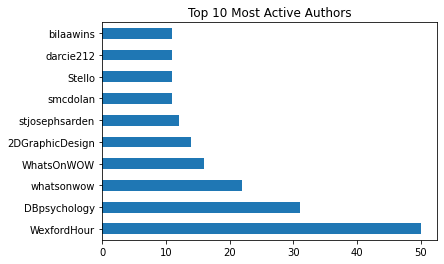

In [17]:
pancakes_author_summary = pancakes_author_mentions.head(10)
pancakes_author_summary.plot(kind="barh",title="Top 10 Most Active Authors")
plt.show()

In [18]:
#Use pivot tables to find the total reach per influencer
#To identify who was most influential when talking about pancakes

In [19]:
pancakes_author_reach = pancakes_cleaned.pivot_table(values=["Reach"],index="Influencer",aggfunc=np.sum)
pancakes_author_reach

,Reach
Influencer,
00Hagane,154
00hagane,155
0xlebowski,519
100DaysOfWalkin,572
100daysofwalkin,572
...,...
ziggyzagzag,1951
zita_eskills,337
zommyb,84


In [20]:
#Sort the Reach column in descending order to see those with highest influence
#Plot the top 10 on a graph

In [21]:
pancakes_topreach = pancakes_author_reach.sort_values("Reach",ascending=False)
topreach_graph = pancakes_topreach.head(10)
topreach_graph

,Reach
Influencer,
rte,4620176
spin1038,1556663
irishexaminer,1415835
IrishTimes,1297452
thejournal_ie,694155
independent_ie,684584
LovinDublin,645142
goddesskatttttt,592788
irelandamvmtv,436912


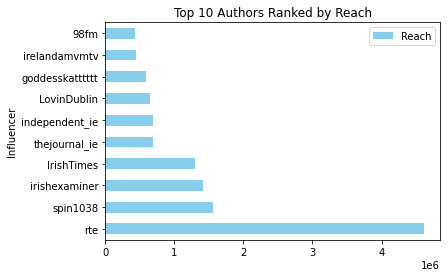

In [22]:
topreach_graph.plot(kind="barh", color="skyblue", title="Top 10 Authors Ranked by Reach")
plt.show()

In [23]:
#Find out which authors generated the highest engagements
#Plot the Top 10 on a graph

In [24]:
pancakes_engagement = pancakes_cleaned.pivot_table(values=["Engagement"],index="Influencer",aggfunc=np.sum)
pancakes_topengagement = pancakes_engagement.sort_values("Engagement",ascending=False)
engage_graph = pancakes_topengagement.head(10)
engage_graph

,Engagement
Influencer,
jameskavanagh_,3944
darren_conway,3802
iresimpsonsfans,3565
justinestafford,2977
__niamho,1703
crossytweets,914
blarneykate,863
twisteddoodles,735
conorsclips,438


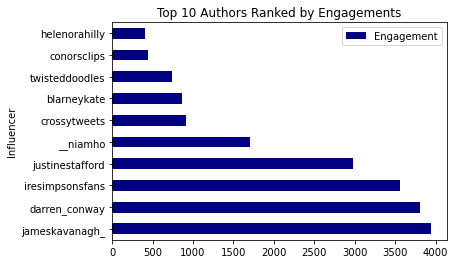

In [25]:
engage_graph.plot(kind="barh", color="navy", title="Top 10 Authors Ranked by Engagements")
plt.show()

In [26]:
#See if there is any link between high reach account and the engagements they generate

In [27]:
#Add the Reach DF & Engagements DF together
#Normally would have created a pivot table with Reach & Engagement columns
#However merging DataFrames is needed for the assignment 

In [28]:
pancakes_top_authors = pd.merge(pancakes_author_reach, pancakes_engagement, left_index=True, right_index=True)
pancakes_top_authors.sort_values("Reach",ascending=False)

,Reach,Engagement
Influencer,,
rte,4620176,45
spin1038,1556663,2
irishexaminer,1415835,0
IrishTimes,1297452,7
thejournal_ie,694155,13
...,...,...
seacowsurfco,0,0
gr8social,0,1
its_sean,0,0


In [29]:
pancakes_top_authors.sort_values("Engagement",ascending=False)

,Reach,Engagement
Influencer,,
jameskavanagh_,58342,3944
darren_conway,57546,3802
iresimpsonsfans,90698,3565
justinestafford,200499,2977
__niamho,1793,1703
...,...,...
delaliciousfood,3194,0
delarivier,725,0
deliciousbydara,47,0


In [30]:
#Create a scatter plot to see if there is any correlation between reach and engagement
#Spoiler: there isn't!

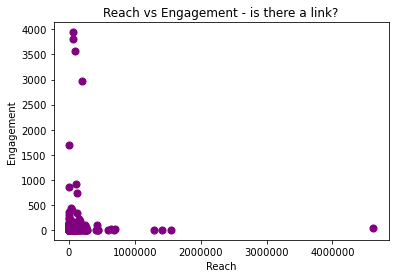

In [31]:
plt.scatter(pancakes_top_authors['Reach'],pancakes_top_authors['Engagement'], s=50, marker="o", color="purple")
plt.xlabel("Reach")
plt.ylabel("Engagement")
plt.title("Reach vs Engagement - is there a link?")
plt.ticklabel_format(style='plain')
plt.show()

# Date Analysis

In [32]:
#Find out which date was most popular for pancake conversation
#Plot the results to show the level of conversation

In [33]:
pancakes_date = pancakes_cleaned["Date"].value_counts(sort=False).sort_index()
pancakes_date

2022-02-23      74
2022-02-24      81
2022-02-25      80
2022-02-26     100
2022-02-27     121
2022-02-28     593
2022-03-01    4296
2022-03-02     501
2022-03-03     108
2022-03-04      90
2022-03-05      41
2022-03-06      47
2022-03-07      33
2022-03-08      39
Name: Date, dtype: int64

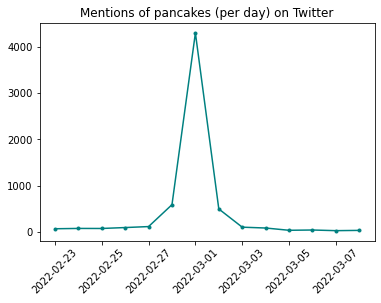

In [34]:
pancakes_date.plot(kind="line",color="teal",rot=45, title="Mentions of pancakes (per day) on Twitter", marker='.')
plt.show()

In [35]:
#Subset the data to only show mentions from WexfordHour
#Find out what day they were most active on Twitter

In [36]:
pancakes_cleaned_ind = pancakes_cleaned.set_index("Influencer")
pancakes_cleaned_ind

,Date,Time,URL,Hit Sentence,Source,Country,Reach,Engagement,Sentiment
Influencer,,,,,,,,,
macymaybe1,2022-03-08,06:45PM,https://twitter.com/MacyMaybe1/statuses/150126...,QT @pancakewafflet1: Paris brun 👍 ; what color...,Twitter,Ireland,236,0,Neutral
cally_callly,2022-03-08,06:27PM,https://twitter.com/cally_callly/statuses/1501...,RT @SaitamaUniverse: QT @jbrizendine: The spee...,Twitter,Ireland,530,0,Positive
mcpsalmmy1,2022-03-08,06:26PM,https://twitter.com/Mcpsalmmy1/statuses/150126...,@PancakeChubby @UnitedStandMUFC Thank me later...,Twitter,Ireland,199,0,Positive
aiplf_ireland,2022-03-08,05:56PM,https://twitter.com/AIPLF_Ireland/statuses/150...,RT @domballyfermot: *On fait des crêpes!!!!*🇫🇷...,Twitter,Ireland,833,0,Neutral
CryptoJ1mbo,2022-03-08,03:13PM,http://twitter.com/CryptoJ1mbo/statuses/150121...,"RT @WatcherGuru: JUST IN: PancakeSwap, the #1 ...",Twitter,Ireland,1319,0,Neutral
...,...,...,...,...,...,...,...,...,...
noeleenhanway,2022-02-23,01:28AM,https://twitter.com/NoeleenHanway/statuses/149...,@sjanemurf It's pancake week. Rules were chang...,Twitter,Ireland,517,0,Neutral
letsrockinroll3,2022-02-23,01:23AM,http://twitter.com/letsrockinroll3/statuses/14...,#Trending #worldwar3 💣 & #Pancaketuesday 🥞 Bea...,Twitter,Ireland,3659,0,Positive
letsrockinroll3,2022-02-23,01:21AM,https://twitter.com/letsrockinroll3/statuses/1...,@thatniamh Now you get 2 Pancake Tuesdays. Hom...,Twitter,Ireland,3659,0,Neutral


In [37]:
wexfordhour_tweets = pancakes_cleaned_ind.loc["WexfordHour"]
wexfordhour_tweets

,Date,Time,URL,Hit Sentence,Source,Country,Reach,Engagement,Sentiment
Influencer,,,,,,,,,
WexfordHour,2022-03-01,10:07PM,http://twitter.com/WexfordHour/statuses/149878...,RT @DBpsychology: @WexfordHour @Zita_eskills @...,Twitter,Ireland,4306,0,Neutral
WexfordHour,2022-03-01,10:06PM,http://twitter.com/WexfordHour/statuses/149878...,"RT @DBpsychology: @Zita_eskills Let me know, v...",Twitter,Ireland,4306,0,Positive
WexfordHour,2022-03-01,10:06PM,http://twitter.com/WexfordHour/statuses/149878...,@DBpsychology @Zita_eskills @OliversofGorey Ar...,Twitter,Ireland,4306,3,Neutral
WexfordHour,2022-03-01,10:05PM,http://twitter.com/WexfordHour/statuses/149878...,RT @DBpsychology: @Zita_eskills @WexfordHour @...,Twitter,Ireland,4306,0,Neutral
WexfordHour,2022-03-01,10:04PM,http://twitter.com/WexfordHour/statuses/149878...,QT @Zita_eskills: Sound advice @Zita_eskills h...,Twitter,Ireland,4306,0,Positive
WexfordHour,2022-03-01,10:03PM,http://twitter.com/WexfordHour/statuses/149878...,RT @2DGraphicDesign: Lovely to catch up with e...,Twitter,Ireland,4306,0,Positive
WexfordHour,2022-03-01,10:02PM,http://twitter.com/WexfordHour/statuses/149878...,"RT @DBpsychology: @Zita_eskills Keeping busy, ...",Twitter,Ireland,4306,0,Neutral
WexfordHour,2022-03-01,10:02PM,http://twitter.com/WexfordHour/statuses/149878...,QT @Zita_eskills: Many stores still have their...,Twitter,Ireland,4306,0,Neutral
WexfordHour,2022-03-01,10:00PM,http://twitter.com/WexfordHour/statuses/149878...,RT @WexfordHour: Thank you for joining the con...,Twitter,Ireland,4306,0,Neutral


In [38]:
wexfordhour_tweets_date = wexfordhour_tweets["Date"].value_counts(sort=False)
wexfordhour_tweets_date

2022-03-01    50
Name: Date, dtype: int64

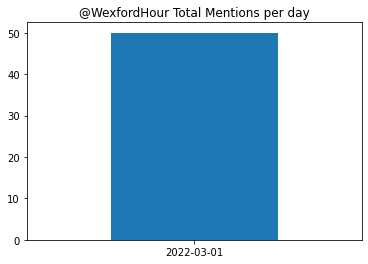

In [39]:
wexfordhour_tweets_date.plot(kind="bar",rot=360, title="@WexfordHour Total Mentions per day")
plt.show()

In [40]:
#Look further into Pancake Tuesday - subset the data for that date

In [41]:
pancake_tuesday = pancakes_cleaned[pancakes_cleaned["Date"] == "2022-03-01"]
pancake_tuesday

,Date,Time,URL,Hit Sentence,Source,Influencer,Country,Reach,Engagement,Sentiment
859,2022-03-01,11:58PM,https://twitter.com/DrSumiDunne/statuses/14988...,".Savoury pancakes 🥞 Mushrooms, garlic, & spina...",Twitter,drsumidunne,Ireland,4890,0,Neutral
860,2022-03-01,11:57PM,https://twitter.com/joconnellire/statuses/1498...,RT @JustineStafford: Yes it’s Pancake Tuesday ...,Twitter,joconnellire,Ireland,403,0,Neutral
861,2022-03-01,11:54PM,https://twitter.com/Clisare/statuses/149880889...,RT @JamesKavanagh_: Absolutely each to their o...,Twitter,clisare,Ireland,20963,0,Neutral
862,2022-03-01,11:53PM,https://twitter.com/NJ_Spartan/statuses/149880...,RT @iresimpsonsfans: Jesus stuffing himself wi...,Twitter,nj_spartan,Ireland,157,0,Neutral
863,2022-03-01,11:52PM,https://twitter.com/mosey538/statuses/14988083...,RT @kellymccartneyx: QT @MrGeorgeWallace: Same...,Twitter,mosey538,Ireland,841,0,Neutral
...,...,...,...,...,...,...,...,...,...,...
5150,2022-03-01,12:10AM,https://twitter.com/Karenabd95/statuses/149845...,RT @yup_dilfs: pancake tuesday is the one day ...,Twitter,karenabd95,Ireland,955,0,Negative
5151,2022-03-01,12:05AM,https://twitter.com/Eksdwt/statuses/1498449190...,Wait it’s Pancake Tuesday,Twitter,eksdwt,Ireland,368,0,Neutral
5152,2022-03-01,12:02AM,https://twitter.com/adunlea/statuses/149844847...,RT @Allrecipes: Yum - my first time making pot...,Twitter,adunlea,Ireland,8174,0,Positive
5153,2022-03-01,12:01AM,http://twitter.com/weshteen/statuses/149844838...,RT @BlackhillGAA: Best of luck to the ladies t...,Twitter,weshteen,Ireland,351,0,Positive


In [42]:
#See who where the most active authors on pancake tuesday

In [43]:
pancake_tuesday_authors = pancake_tuesday["Influencer"].value_counts()
pancake_tuesday_authors

WexfordHour        50
DBpsychology       31
whatsonwow         18
2DGraphicDesign    14
WhatsOnWOW         12
                   ..
LifeStyleRTE        1
dugganvet           1
glenns152           1
michellecorry       1
weshteen            1
Name: Influencer, Length: 3344, dtype: int64

# Insights

In [44]:
#Initial Insights:
#1 - 4,516 unique authors tweeted about pancakes over the past 14 days 
#2 - @WexfordHour tweeted most about pancakes over the period
#3 - @RTE had the highest reach during the period
#4 - @jameskavanagh_ generated the highest engagements
#5 - There is no correlation between those with the highest reach and the engagements they generate
#4 - The biggest spike in mentions for pancakes occurred on Tuesday 1st March 2020 with over 4,000 mentions
#5 - 3,342 unique authors tweeted about pancakes on pancake Tuesday
#6 - @WexfordHour tweeted 50 times, but only on Tuesday March 2020. This suggests that they do not regularly tweet about pancakes, but only did so on Pancake Tuesday.
#7 - Commonly used words over the 14 day period included - Tuesday, pancaketuesday, happy, delicious, shrove